In [1]:
from typing import TypedDict

class State(TypedDict):
    customer_name: str
    my_age: int

In [8]:
def node_1(state: State) -> State:
    return state

def node_2(state: State) -> State:
    return state

def node_3(state: State) -> State:
    return state

In [9]:
import random
from typing import Literal

def route_edge(state: State) -> Literal["node_2", "node_3"]:
    if random.random() < 0.5:
        return "node_2"
    return "node_3"


In [15]:
from langgraph.graph import StateGraph, START, END

graph = StateGraph(State)

graph.add_node("node_1", node_1)
graph.add_node("node_2", node_2)
graph.add_node("node_3", node_3)

graph.add_edge(START, "node_1")
graph.add_conditional_edges("node_1", route_edge)
graph.add_edge("node_2", END)
graph.add_edge("node_3", END)

agent = graph.compile()


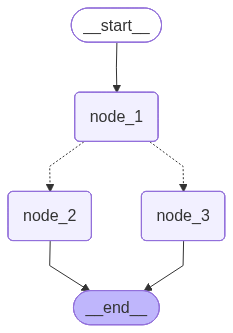

In [16]:
from IPython.display import Image, display

display(Image(agent.get_graph().draw_mermaid_png()))


In [17]:
from langgraph.graph import StateGraph, START, END

graph = StateGraph(State)

graph.add_node("node_2", node_2)
graph.add_node("node_3", node_3)

graph.add_conditional_edges(START, route_edge)
graph.add_edge("node_2", END)
graph.add_edge("node_3", END)

agent = graph.compile()


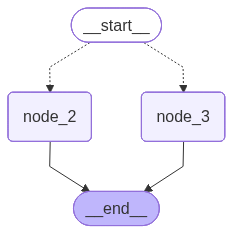

In [18]:
from IPython.display import Image, display

display(Image(agent.get_graph().draw_mermaid_png()))
